# Redes Neurais

As Redes Neurais recebem esse nome por serem inspiradas no sistema nervoso. O impulso nervoso ocorre no neurônio e ele é passado a diante para outros neurônios.
<br>
<img src='img/nervoso5.jpg'>
<br>
O mesmo conceito ocorre nesse tipo de algoritmo. A informação entra, passa por uma camada de neurônios que irão fazer os cálculos de pesos até chegar em uma última camada onde haverá a saída.
<br>
<img src='img/rede_neural.gif'>
<br>


## Funcionamento de uma Rede Neural

As entradas de uma rede possuem determinado peso e, quando chegam nos nurônios, elas são atualizadas. Essa atualização ocorre devido às funções de ativações. Existem vários tipos de funções com finalidades diferentes. Por exemplo, uma função softmax pode ser usada para classificação de N itens, enquanto uma função de ativação linear é melhor para uso de regressão.

Cada passagem na rede (época) o peso das saídas dos neurônios são atualizados com o gradiente descendente a fim de minimizar a função de perda (Esses conceitos já foram escritos nesse repositório). Dessa maneira a rede vai ficando mais precisa com as épocas. Porém quanto maior o número de épocas mais específico fica a saída, assim o modelo não consegue generalizar bem os dados, isso é chamado de overfiting. 

## Tipos de arquiteturas

As redes neurais utilizam bastante recursos computacionais pois fazem cálculos matriciais. Porém, com a melhora dos hardwares e surgimento de novas plataformas, as redes podem ser treinadas cada vez em mais ambientes. Isso fez com que surgissem novos padrões de redes, com diferentes números de camadas, número de neurônios e funcionamento. Ou seja, novas arquiteturas.


### Redes neurais profundas

São redes que possuem várias camadas de neurônios entre as entradas e a saída.

<img src='img/rede_neural_profunda.png'>



### Redes neurais convolucionais

As entradas nesse tipo de algoritmos passam por convolução a fim de extrair características. A convolução é um operador que sobrepõe funções resultando em uma outra função.

<img src='img/convolução.gif'>

Após as camadas de convolução obtém-se um vetor para terminar de classificar a rede. 

### Redes neurais recorrentes

Esse tipo de arquitetura utiliza memória para sua classificação. Ou seja, a rede utiliza de sequência de eventos, "memorizados", para chegar à uma classificação

<img src='img/rnn.png'>

## Problema

Iremos treinar uma rede usando pytorch para classificação 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
import seaborn as sns

/home/matheus/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

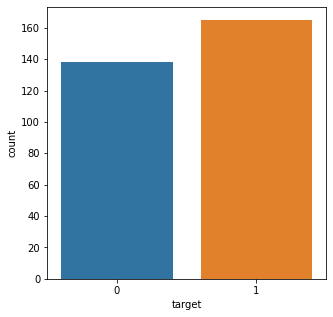

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(df['target'])

In [26]:
import torch

# Redes Neurais são complexas então utiliza-se gpu's para treina-las
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("Treinando em CPU")

if train_on_gpu:
    print("Treinando na GPU")

Treinando em CPU


As colunas "trestbps" "chol" "thalach" devem ser normalizadas

In [27]:
df["trestbps"] = (df["trestbps"]-df["trestbps"].min())/(df["trestbps"].max()-df["trestbps"].min())

0      0.481132
1      0.339623
2      0.339623
3      0.245283
4      0.245283
         ...   
298    0.433962
299    0.150943
300    0.471698
301    0.339623
302    0.339623
Name: trestbps, Length: 303, dtype: float64

In [28]:
df["chol"] = (df["chol"]-df["chol"].min())/(df["chol"].max()-df["chol"].min())
df["thalach"] = (df["thalach"]-df["thalach"].min())/(df["thalach"].max()-df["thalach"].min())

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,37,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,41,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,56,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,57,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0.433962,0.262557,0,1,0.396947,1,0.2,1,0,3,0
299,45,1,3,0.150943,0.315068,0,1,0.465649,0,1.2,1,0,3,0
300,68,1,0,0.471698,0.152968,1,1,0.534351,0,3.4,1,2,3,0
301,57,1,0,0.339623,0.011416,0,1,0.335878,1,1.2,1,1,3,0


In [31]:
# Divisão do tamanho do dataset de treino e de teste

test_size = int(df.shape[0]*0.2) # 20% do dataset
train_size = df.shape[0] - test_size

print(f"Train size: {train_size} \nTest size: {test_size}")

Train size: 243 
Test size: 60


In [42]:
header = df.columns

In [43]:
from torch.utils.data.dataset import Dataset

class Batimentos(Dataset):
  def __init__(self):
    xy = df
    self.x = torch.tensor(df[header[:-1]].values, dtype= torch.float32)
    self.y = torch.tensor((df[header[-1]].values), dtype= int)
    self.tamanho = xy.shape[0]
  
  def __len__(self):
    return self.tamanho
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [44]:
dataset = Batimentos()

In [45]:
from torch.utils.data import DataLoader


batch_size = 10
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle= False)

In [88]:
test_loader

In [85]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Entrada do vetor de dados
        self.fc1 = nn.Linear(13, 500) # Primeira camada com 40 neuronios
        self.fc2 = nn.Linear(500, 400) # Segunda camada com 50 neuronios
        self.fc3 = nn.Linear(400, 350)
        self.fc4 = nn.Linear(350, 200)
        self.fc5 = nn.Linear(200, 100)
        self.fc6 = nn.Linear(100, 30)
        self.fc7 = nn.Linear(30, 10) # Camada com 10 neuronios
        self.fc8 = nn.Linear(10, 1) # Camada com 1 neuronio


    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.sigmoid(self.fc8(x))
        
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (fc1): Linear(in_features=13, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=350, bias=True)
  (fc4): Linear(in_features=350, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=30, bias=True)
  (fc7): Linear(in_features=30, out_features=10, bias=True)
  (fc8): Linear(in_features=10, out_features=1, bias=True)
)


In [80]:
import torch.optim as optim

momentum = 3e-4
lr = 0.001 # Taxa de aprendizagem

# Função erro
criterion = nn.BCELoss()

# Gradiente descendente
optmizer = optim.SGD(model.parameters(), lr= lr, momentum= momentum)

In [78]:
def train_model(nEpochs = 10):
    train_loss_list =[]

    for epoch in range(nEpochs):
        train_loss= 0

        for sample, target in train_loader:       
        # Zerar o gradiente
            optmizer.zero_grad()
        # Gera saída do modelo
            outputs = model(sample)
        # Calcula o erro
            target = target.unsqueeze(1).float()
            loss = criterion(outputs, target)
            train_loss+=loss.item()
        # Calcula os gradientes
            loss.backward()
        # Otimiza o modelo
            optmizer.step()

        train_loss = train_loss/len(train_loader.dataset)
        train_loss_list.append(train_loss)
      
        if (not epoch%5):
            print(f"Época: {epoch} \nLoss Treino: {train_loss}")


    return train_loss_list

In [86]:
trained_data = train_model(1000)

/home/matheus/.local/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Época: 0 
Loss Treino: 0.0712583859761556
Época: 5 
Loss Treino: 0.07108228736453587
Época: 10 
Loss Treino: 0.07108219783492539
Época: 15 
Loss Treino: 0.07125519921259625
Época: 20 
Loss Treino: 0.07142663517116028
Época: 25 
Loss Treino: 0.07142923643559586
Época: 30 
Loss Treino: 0.07159899365264202
Época: 35 
Loss Treino: 0.0712587899631924
Época: 40 
Loss Treino: 0.07125313022009139
Época: 45 
Loss Treino: 0.07143283773351598
Época: 50 
Loss Treino: 0.07160302984371107
Época: 55 
Loss Treino: 0.07108210732416852
Época: 60 
Loss Treino: 0.07108341936221338
Época: 65 
Loss Treino: 0.07143048690670312
Época: 70 
Loss Treino: 0.0714293492674337
Época: 75 
Loss Treino: 0.0712578230433994
Época: 80 
Loss Treino: 0.07143100127271174
Época: 85 
Loss Treino: 0.07142895607300746
Época: 90 
Loss Treino: 0.07142986314286912
Época: 95 
Loss Treino: 0.07125591446833356
Época: 100 
Loss Treino: 0.07142703253545879
Época: 105 
Loss Treino: 0.07125413466873483
Época: 110 
Loss Treino: 0.071081732

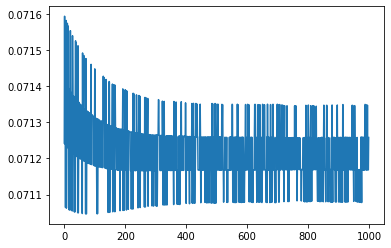

In [83]:
plt.plot(trained_data)

In [89]:
for sample, target in train_loader:
  with torch.no_grad():# isso desabilita o cálculo de gradientes
    if torch.cuda.is_available():
      inputs = torch.tensor(sample, dtype=torch.float32).to('cuda')
      targets = torch.tensor(target, dtype=torch.float32).to('cuda')
    else:
      inputs = torch.tensor(sample, dtype=torch.float32)
      targets = torch.tensor(target,  dtype=torch.float32)  
    outputs = model(inputs)

correct_classification = (torch.abs(outputs-targets)<0.5).sum()
print(" Correct classifcation: " + str(correct_classification.item())+ '/'+str(len(test_data)))

 Correct classifcation: 3/60


/tmp/ipykernel_18450/2113059501.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(sample, dtype=torch.float32)
/tmp/ipykernel_18450/2113059501.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(target,  dtype=torch.float32)
/home/matheus/.local/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


## Referencias

https://www.kdnuggets.com/2019/10/introduction-artificial-neural-networks.html
https://www.kdnuggets.com/2020/06/introduction-convolutional-neural-networks.html
https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/
https://www.kaggle.com/rajeshjnv/heart-disease-classification-neural-network

https://ntechlab.com/pt_br/blog/redes-neurais-parte-2/
